In [1]:
!pip install gdelt
import gdelt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

here
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
children_mortality = pd.read_csv('/content/drive/MyDrive/children_mortality_rate.csv')
adult_mortality = pd.read_csv('/content/drive/MyDrive/adult_mortality_rate.csv')
suicide_rates = pd.read_csv('/content/drive/MyDrive/suicide_rates.csv')
poverty = pd.read_csv('/content/drive/MyDrive/poverty.csv')

In [3]:
children_mortality['Value_Cleaned'] = children_mortality['Value'].str.extract(r'([0-9]+\.[0-9]+)')

# Convert the extracted values to float for numerical operations
children_mortality['Value_Cleaned'] = children_mortality['Value_Cleaned'].astype(float)
children_mortality['Value_Cleaned'] = children_mortality['Value_Cleaned'] * 100

# Select the required columns
filtered_children_mortality = children_mortality[['Value_Cleaned', 'Location', 'Period']]
filtered_children_mortality = filtered_children_mortality.rename(columns={'Value_Cleaned': f'Value_children_mortality'})


In [4]:
suicide_rates['Value_Cleaned'] = suicide_rates['Value'].str.extract(r'([0-9]+\.[0-9]+)')

# Convert the extracted values to float for numerical operations
suicide_rates['Value_Cleaned'] = suicide_rates['Value_Cleaned'].astype(float)
suicide_rates['Value_Cleaned'] = suicide_rates['Value_Cleaned'] * 100

# Select the required columns
filtered_suicide_rates = suicide_rates[['Value_Cleaned', 'Location', 'Period']]
filtered_suicide_rates = filtered_suicide_rates.rename(columns={'Value_Cleaned': f'Value_suicide_rates'})


In [5]:
# filtering the columns
filtered_adult_mortality = adult_mortality[['Value', 'Location', 'Period']]
filtered_poverty = poverty[['Value', 'Location', 'Period']]
# Renaming the columns
filtered_adult_mortality = adult_mortality.rename(columns={'Value': 'Value_adult_mortality'})[['Value_adult_mortality', 'Location', 'Period']]
filtered_poverty = poverty.rename(columns={'Value': 'Value_poverty'})[['Value_poverty', 'Location', 'Period']]

In [6]:
merged_data = filtered_children_mortality.merge(filtered_adult_mortality, on=['Location', 'Period'], how='inner')
merged_data = merged_data.merge(filtered_suicide_rates, on=['Location', 'Period'], how='inner')
merged_data = merged_data.merge(filtered_poverty, on=['Location', 'Period'], how='inner')

In [7]:
who_data = merged_data.groupby(['Location', 'Period']).sum().reset_index()

In [8]:
who_data.head()

,Location,Period,Value_children_mortality,Value_adult_mortality,Value_suicide_rates,Value_poverty
0,Afghanistan,2007,15030.0,7353,12960.0,11.61
1,Afghanistan,2013,12240.0,6336,10800.0,21.60
2,Afghanistan,2016,31590.0,19791,32400.0,67.23
3,Albania,2002,16200.0,8235,37260.0,81.27
4,Albania,2005,14580.0,8532,60480.0,83.97


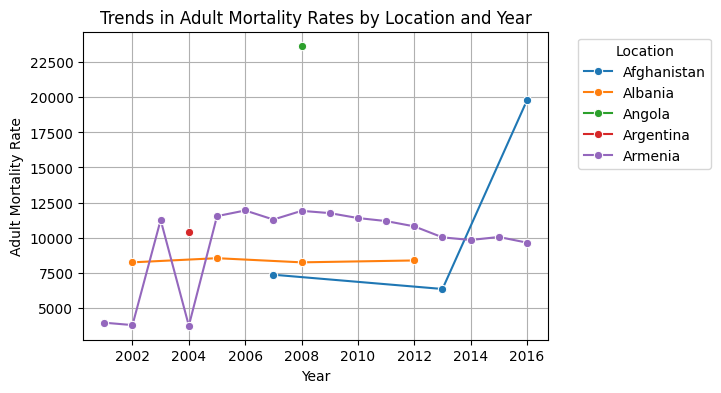

In [31]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_adult_mortality', hue='Location', marker='o')
plt.title('Trends in Adult Mortality Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Adult Mortality Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

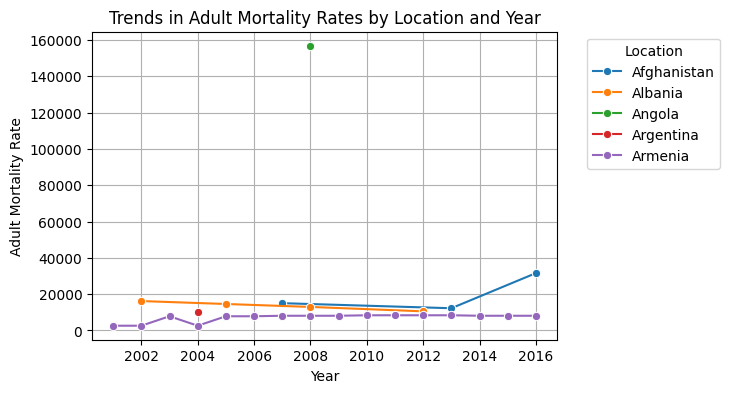

In [32]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_children_mortality', hue='Location', marker='o')
plt.title('Trends in Adult Mortality Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Adult Mortality Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

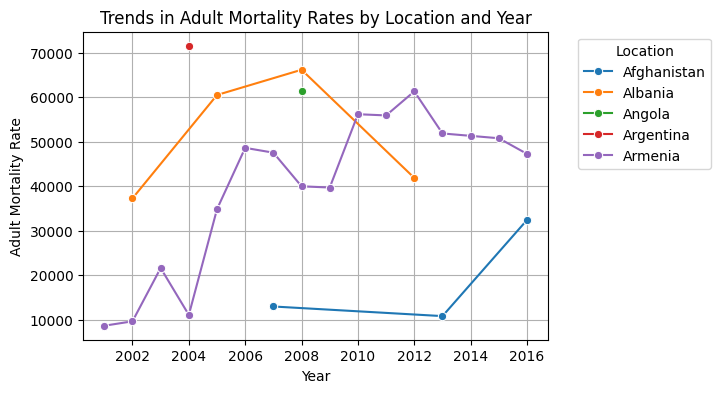

In [33]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_suicide_rates', hue='Location', marker='o')
plt.title('Trends in Adult Mortality Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Adult Mortality Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

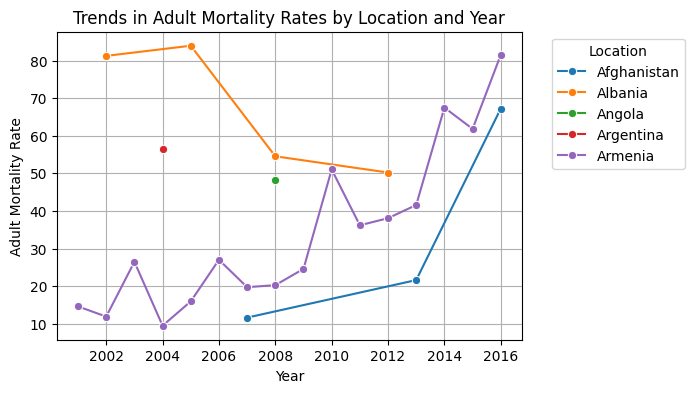

In [34]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_poverty', hue='Location', marker='o')
plt.title('Trends in Adult Mortality Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Adult Mortality Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [9]:
who_data.isna().sum()

Location                    0
Period                      0
Value_children_mortality    0
Value_adult_mortality       0
Value_suicide_rates         0
Value_poverty               0
dtype: int64

In [10]:
import gdelt

In [11]:
gd1 = gdelt.gdelt(version=1)
gkg_results = gd1.Search(['2015 03 15', '2015 04 15'], table='gkg')
gkg_df = pd.DataFrame(gkg_results)

In [12]:
health_keyword = ['HEALTH_NEWS', 'HEALTH', 'DISEASE_OUTBREAK']
health_df = gkg_df[gkg_df['THEMES'].str.contains('|'.join(health_keyword), case=False, na=False)]
health_df.head()

,DATE,NUMARTS,COUNTS,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,TONE,CAMEOEVENTIDS,SOURCES,SOURCEURLS
12,20150410,6,NaN,TAX_FNCACT;TAX_FNCACT_MAN;MANMADE_DISASTER_IMP...,"3#Cheyenne, Wyoming, United States#US#USWY#41....",scott skavdahl,national news,"-8.64197530864198,0.617283950617284,9.25925925...","424415572,424415597,424416393,424415572,424415...",cbs12.com;wics.com;abc22now.com;ktvl.com;wjact...,http://www.cbs12.com/template/inews_wire/wires...
15,20150410,1,NaN,TAX_FNCACT;TAX_FNCACT_GENETICIST;EDUCATION;SOC...,1#Rwanda#RW#RW#-2#30#RW;1#Uganda#UG#UG#1#32#UG...,christina hvilsom;aylwyn scally,university of cambridge,"-7.1875,1.25,8.4375,9.6875,17.1875,0.3125","424206980,424207002,424207502,424207506,424207...",theamericanregister.com,http://www.theamericanregister.com/mountain-go...
25,20150410,1,NaN,SOC_POINTSOFINTEREST;SOC_POINTSOFINTEREST_PRIS...,"3#East Hartford, Connecticut, United States#US...",william styron;gail hardy;kate germond;bernice...,supreme court,"-5.42986425339366,2.71493212669683,8.144796380...","424438284,424438287,424438289,424438291,424438...",newser.com,http://www.newser.com/article/4f4f52886bfa4b78...
38,20150410,1,PROTEST#700##1#Russia#RS#RS#60#100#RS;MOVEMENT...,ARMEDCONFLICT;TAX_WORLDLANGUAGES;TAX_WORLDLANG...,"4#Ingush, Chechnya And Ingushetiya, Russia#RS#...",kavkazky uzel;kavkazsky uzel;secours catholiqu...,european commission refugee;youtube;russian fe...,"-8.65603644646925,0.683371298405467,9.33940774...","424202924,424203519,424203600,424203601,424203...",jamestown.org,http://www.jamestown.org/single/?tx_ttnews[tt_...
49,20150410,1,NaN,LEGISLATION;SECURITY_SERVICES;TAX_FNCACT;TAX_F...,1#United States#US#US#38#-97#US;3#University O...,peter simonson;christine leonard;susana martinez,drug policy alliance;institute for justice;san...,"-1.62162162162162,5.13513513513514,6.756756756...","424446944,424447749,424447750,424447751,424447898",freebeacon.com,http://freebeacon.com/issues/new-mexico-ends-c...


In [13]:
events_results = gd1.Search(['2015 03 21', '2015 03 23'], coverage=True, table='events')
events_df = pd.DataFrame(events_results)

In [14]:
# Merge the DataFrames on the specified columns
events_df['GLOBALEVENTID'] = events_df['GLOBALEVENTID'].astype(str)

merged_df = pd.merge(events_df, health_df, left_on='GLOBALEVENTID', right_on='CAMEOEVENTIDS')

In [15]:
relevant_columns = ['Year','ActionGeo_FullName', 'CAMEOCodeDescription', 'Actor1Name', 'Actor2Name']
gdelt_data = merged_df[relevant_columns]
gdelt_data.head()

,Year,ActionGeo_FullName,CAMEOCodeDescription,Actor1Name,Actor2Name
0,2015,NaN,Engage in negotiation,NaN,POLICE
1,2015,NaN,Make empathetic comment,NaN,PRESIDENT
2,2015,NaN,"Accuse, not specified below",NaN,PRESIDENT
3,2015,India,"Reject, not specified below",NaN,CONSULATE
4,2015,India,"Reject, not specified below",NaN,CONSULATE


In [16]:
gdelt_data.isna().sum()

Year                       0
ActionGeo_FullName       537
CAMEOCodeDescription       0
Actor1Name               605
Actor2Name              3591
dtype: int64

In [17]:
gdelt_data = gdelt_data.dropna(subset=['ActionGeo_FullName', 'Actor1Name', 'Actor2Name'])
gdelt_data.isna().sum()

Year                    0
ActionGeo_FullName      0
CAMEOCodeDescription    0
Actor1Name              0
Actor2Name              0
dtype: int64

In [18]:
final_data = pd.merge(who_data, gdelt_data, left_on=['Location', 'Period'], right_on=['ActionGeo_FullName', 'Year'], how='inner')


In [19]:
final_data.head()

,Location,Period,Value_children_mortality,Value_adult_mortality,Value_suicide_rates,Value_poverty,Year,ActionGeo_FullName,CAMEOCodeDescription,Actor1Name,Actor2Name
0,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Disapprove, not specified below",PRIME MINISTER,SENATE
1,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Appeal, not specified below",BISHOP,AUSTRALIAN
2,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,Express intent to meet or negotiate,AUSTRALIA,MITSUBISHI
3,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Accuse, not specified below",AUSTRALIA,EMPLOYER
4,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Make statement, not specified below",AUSTRALIA,HUMAN RIGHTS WATCH


In [20]:
# vrskata megju adult mortality i nastanite vo taa godina

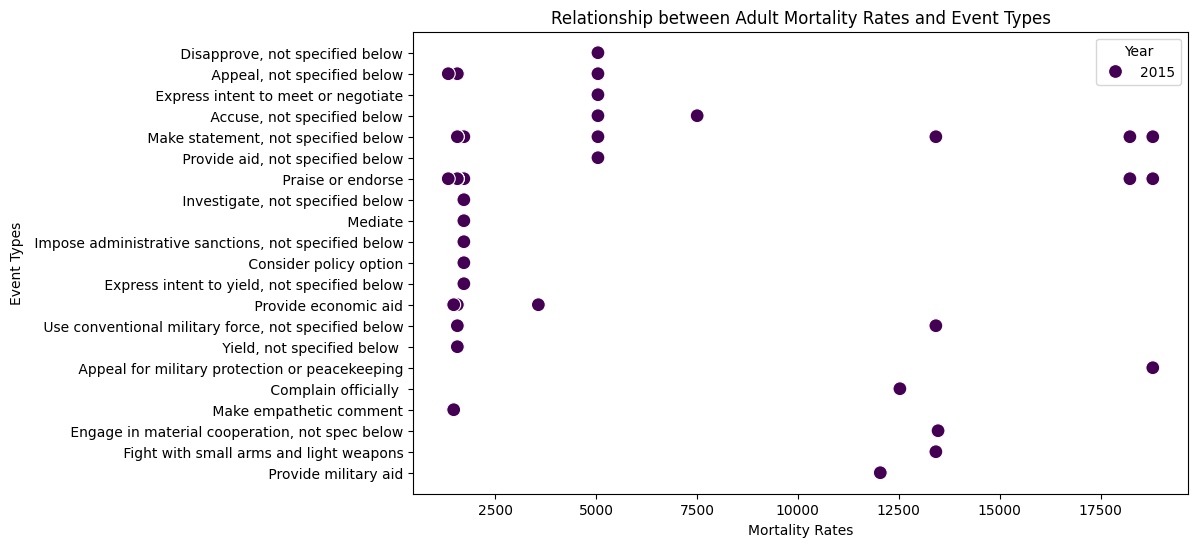

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_adult_mortality', y='CAMEOCodeDescription', hue='Year', palette='viridis', s=100)
plt.title('Relationship between Adult Mortality Rates and Event Types')
plt.xlabel('Mortality Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

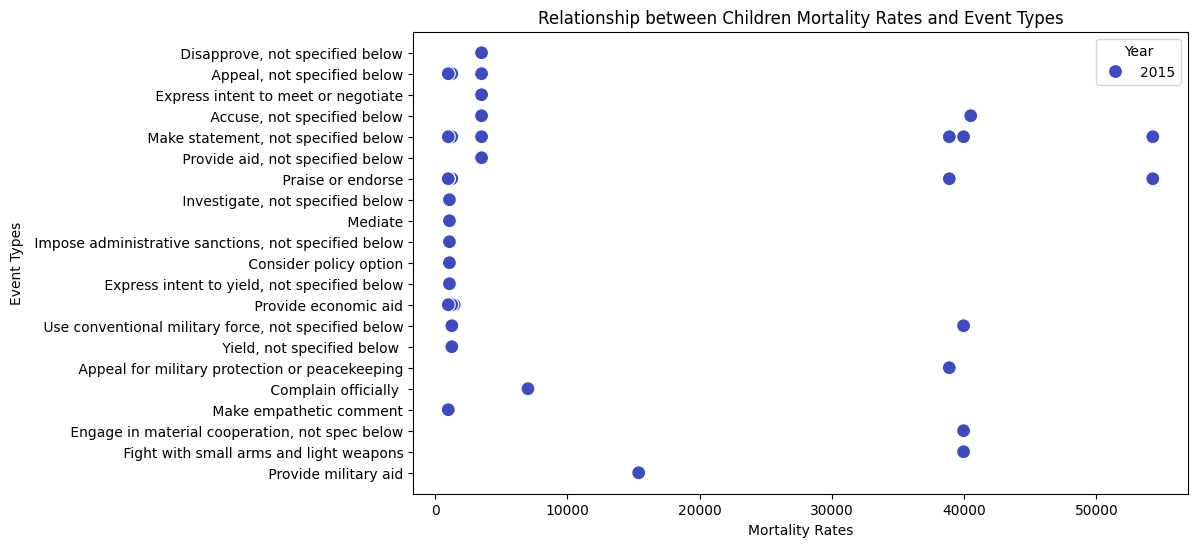

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_children_mortality', y='CAMEOCodeDescription', hue='Year', palette='coolwarm', s=100)
plt.title('Relationship between Children Mortality Rates and Event Types')
plt.xlabel('Mortality Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

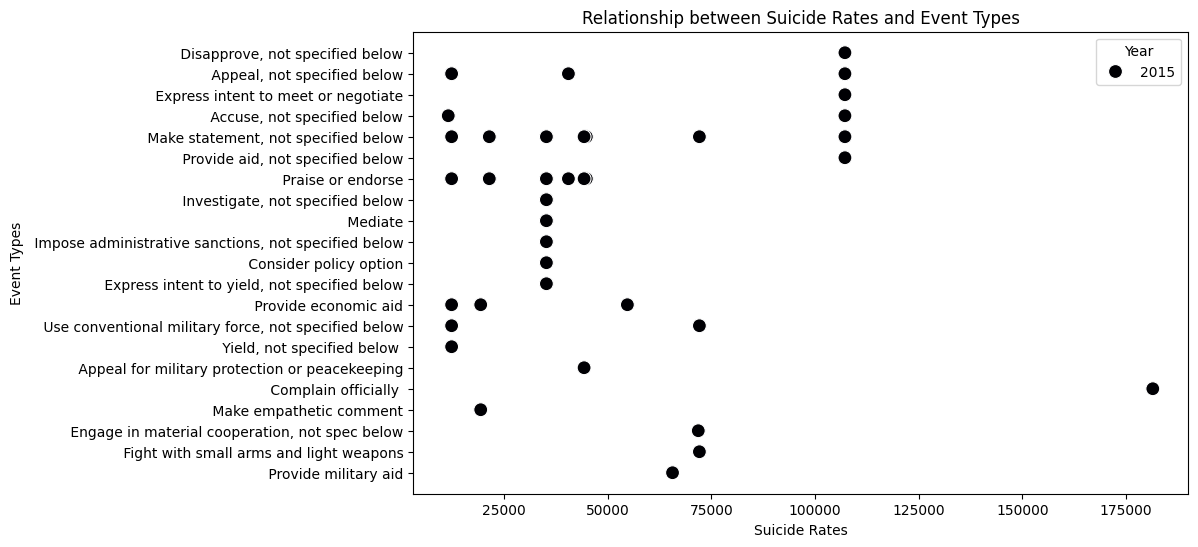

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_suicide_rates', y='CAMEOCodeDescription', hue='Year', palette='magma', s=100)
plt.title('Relationship between Suicide Rates and Event Types')
plt.xlabel('Suicide Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

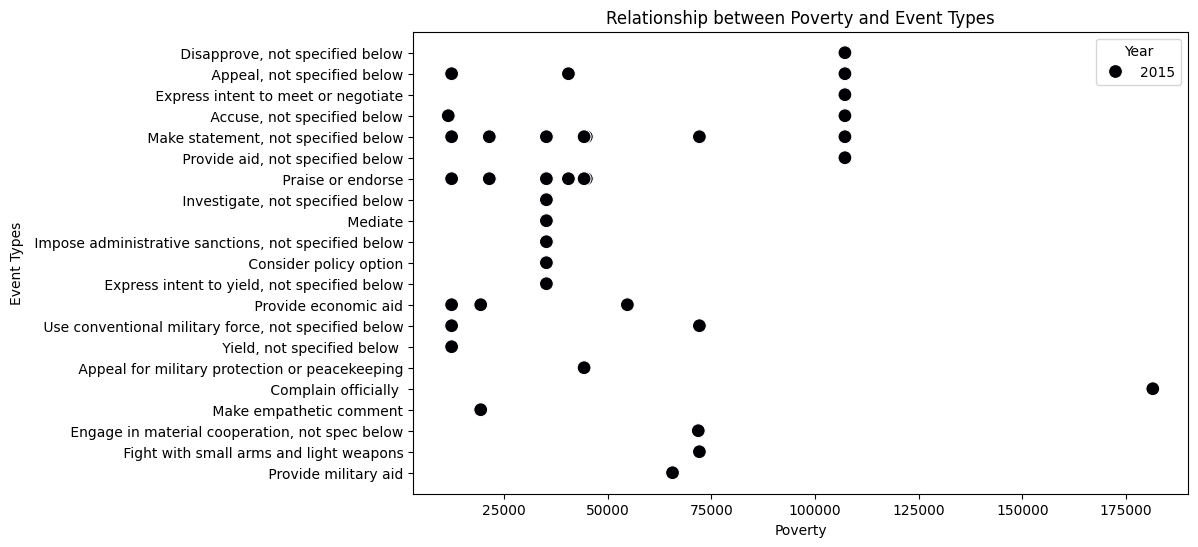

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_suicide_rates', y='CAMEOCodeDescription', hue='Year', palette='inferno', s=100)
plt.title('Relationship between Poverty and Event Types')
plt.xlabel('Poverty')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()